#### ***Steps to Build After Preprocessing:***



#### Feature Engineering and LSTM Autoencoder:

Utilize LSTM Autoencoder to further refine the anomaly detection, focusing on capturing temporal dependencies in the time series data.

Identify anomalies by comparing reconstruction errors with a pre-determined Mean Squared Error (MSE) threshold.

Create derived features from detected anomalies for use in subsequent models.

#### Aggregation of Health Metrics:

Aggregate health indicators over a rolling 5-day window to focus on sustained anomalies rather than isolated spikes.

This aggregation ensures that any predictions made are based on consistent health patterns.

#### Disease Risk Prediction Using Random Forest:

Use the features derived from the anomaly detection stage as input to a Random Forest classifier.

Train the Random Forest model to predict potential health outcomes such as disease risk, workout effectiveness, and hypertension indicators.

In [45]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import_file="C://Users//saipr//OneDrive//Documents//M TECH NITW//ML Project//data_preprocessed.feather"

In [46]:
data=pd.read_feather(import_file)

In [47]:
data.columns

Index(['Patient ID', 'Heart Rate', 'Respiratory Rate', 'Timestamp',
       'Body Temperature', 'Oxygen Saturation', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure', 'Age', 'Gender', 'Weight (kg)',
       'Height (m)', 'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI',
       'Derived_MAP', 'Risk Category', 'Bedtime', 'Wakeup time',
       'Sleep duration', 'Sleep efficiency', 'REM sleep percentage',
       'Deep sleep percentage', 'Light sleep percentage', 'Awakenings',
       'Caffeine consumption', 'Alcohol consumption', 'Smoking status',
       'Exercise frequency', 'Day_label', 'Calories', 'TrackerDistance',
       'TotalSteps'],
      dtype='object')

In [48]:
data=data.sort_values(by=["Patient ID","Day_label"],ascending=True)
data

,Patient ID,Heart Rate,Respiratory Rate,Timestamp,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,...,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Day_label,Calories,TrackerDistance,TotalSteps
0,1,95,17,2024-07-19 20:33:45.729841,36.550568,97.869537,113,78,56,Female,...,20.0,1.0,50.0,0.0,No,0.0,5,2937,9,14172
1,1,95,17,2024-07-19 20:33:45.729841,36.550568,97.869537,113,78,56,Female,...,20.0,1.0,50.0,0.0,No,0.0,6,2742,8,12862
2,1,95,17,2024-07-19 20:33:45.729841,36.550568,97.869537,113,78,56,Female,...,20.0,1.0,50.0,0.0,No,0.0,7,2668,7,11179
3,1,95,17,2024-07-19 20:33:45.729841,36.550568,97.869537,113,78,56,Female,...,20.0,1.0,50.0,0.0,No,0.0,8,2098,3,5273
4,1,95,17,2024-07-19 20:33:45.729841,36.550568,97.869537,113,78,56,Female,...,20.0,1.0,50.0,0.0,No,0.0,9,2076,3,4631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378193,148069,93,13,2024-03-03 01:42:46.245949,36.025597,98.725372,127,79,89,Male,...,53.0,3.0,0.0,3.0,Yes,3.0,26,1659,2,4188
4378194,148069,93,13,2024-03-03 01:42:46.245949,36.025597,98.725372,127,79,89,Male,...,53.0,3.0,0.0,3.0,Yes,3.0,27,2105,8,12342
4378195,148069,93,13,2024-03-03 01:42:46.245949,36.025597,98.725372,127,79,89,Male,...,53.0,3.0,0.0,3.0,Yes,3.0,28,2361,10,15448
4378196,148069,93,13,2024-03-03 01:42:46.245949,36.025597,98.725372,127,79,89,Male,...,53.0,3.0,0.0,3.0,Yes,3.0,29,1855,4,6722


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4378198 entries, 0 to 4378197
Data columns (total 33 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Patient ID                int64  
 1   Heart Rate                int16  
 2   Respiratory Rate          int16  
 3   Timestamp                 object 
 4   Body Temperature          float32
 5   Oxygen Saturation         float32
 6   Systolic Blood Pressure   int16  
 7   Diastolic Blood Pressure  int16  
 8   Age                       int16  
 9   Gender                    object 
 10  Weight (kg)               float32
 11  Height (m)                float32
 12  Derived_HRV               float32
 13  Derived_Pulse_Pressure    int16  
 14  Derived_BMI               float32
 15  Derived_MAP               float32
 16  Risk Category             object 
 17  Bedtime                   object 
 18  Wakeup time               object 
 19  Sleep duration            float32
 20  Sleep efficiency        

In [50]:
data=data.drop(columns=["Timestamp","Bedtime","Wakeup time"])
data       

,Patient ID,Heart Rate,Respiratory Rate,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,Weight (kg),...,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Day_label,Calories,TrackerDistance,TotalSteps
0,1,95,17,36.550568,97.869537,113,78,56,Female,52.910328,...,20.0,1.0,50.0,0.0,No,0.0,5,2937,9,14172
1,1,95,17,36.550568,97.869537,113,78,56,Female,52.910328,...,20.0,1.0,50.0,0.0,No,0.0,6,2742,8,12862
2,1,95,17,36.550568,97.869537,113,78,56,Female,52.910328,...,20.0,1.0,50.0,0.0,No,0.0,7,2668,7,11179
3,1,95,17,36.550568,97.869537,113,78,56,Female,52.910328,...,20.0,1.0,50.0,0.0,No,0.0,8,2098,3,5273
4,1,95,17,36.550568,97.869537,113,78,56,Female,52.910328,...,20.0,1.0,50.0,0.0,No,0.0,9,2076,3,4631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378193,148069,93,13,36.025597,98.725372,127,79,89,Male,60.847492,...,53.0,3.0,0.0,3.0,Yes,3.0,26,1659,2,4188
4378194,148069,93,13,36.025597,98.725372,127,79,89,Male,60.847492,...,53.0,3.0,0.0,3.0,Yes,3.0,27,2105,8,12342
4378195,148069,93,13,36.025597,98.725372,127,79,89,Male,60.847492,...,53.0,3.0,0.0,3.0,Yes,3.0,28,2361,10,15448
4378196,148069,93,13,36.025597,98.725372,127,79,89,Male,60.847492,...,53.0,3.0,0.0,3.0,Yes,3.0,29,1855,4,6722


In [51]:
from sklearn.preprocessing import LabelEncoder
encoded=LabelEncoder()
data['Gender']=encoded.fit_transform(data['Gender']).astype('int16')
data['Smoking status']=encoded.fit_transform(data['Smoking status']).astype('int16')

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4378198 entries, 0 to 4378197
Data columns (total 30 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Patient ID                int64  
 1   Heart Rate                int16  
 2   Respiratory Rate          int16  
 3   Body Temperature          float32
 4   Oxygen Saturation         float32
 5   Systolic Blood Pressure   int16  
 6   Diastolic Blood Pressure  int16  
 7   Age                       int16  
 8   Gender                    int16  
 9   Weight (kg)               float32
 10  Height (m)                float32
 11  Derived_HRV               float32
 12  Derived_Pulse_Pressure    int16  
 13  Derived_BMI               float32
 14  Derived_MAP               float32
 15  Risk Category             object 
 16  Sleep duration            float32
 17  Sleep efficiency          float32
 18  REM sleep percentage      float32
 19  Deep sleep percentage     float32
 20  Light sleep percentage  

A Gaussian noise is added using the np.random.normal(mean, std_dev, len(data)) function, which generates random numbers from a normal distribution with the specified mean and standard deviation (std_dev). The value is then adjusted, rounded, and sometimes converted to an integer, depending on the nature of the data.

In [53]:
data['Heart Rate']=(data['Heart Rate']+np.random.normal(-1,1,len(data))).round().astype(int)
data['Respiratory Rate']=(data['Respiratory Rate']+np.random.normal(-1,1,len(data))).round().astype(int)
data['Systolic Blood Pressure']=(data['Systolic Blood Pressure']+np.random.normal(0,2,len(data))).round().astype(int)
data['Diastolic Blood Pressure']=(data['Diastolic Blood Pressure']+np.random.normal(0,2,len(data))).round().astype(int)
data['Body Temperature']=(data['Body Temperature']+np.random.normal(0,0.2,len(data)))
data['Oxygen Saturation']=(data['Oxygen Saturation']+np.random.normal(-1,1,len(data))).round().astype(int)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4378198 entries, 0 to 4378197
Data columns (total 30 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Patient ID                int64  
 1   Heart Rate                int32  
 2   Respiratory Rate          int32  
 3   Body Temperature          float64
 4   Oxygen Saturation         int32  
 5   Systolic Blood Pressure   int32  
 6   Diastolic Blood Pressure  int32  
 7   Age                       int16  
 8   Gender                    int16  
 9   Weight (kg)               float32
 10  Height (m)                float32
 11  Derived_HRV               float32
 12  Derived_Pulse_Pressure    int16  
 13  Derived_BMI               float32
 14  Derived_MAP               float32
 15  Risk Category             object 
 16  Sleep duration            float32
 17  Sleep efficiency          float32
 18  REM sleep percentage      float32
 19  Deep sleep percentage     float32
 20  Light sleep percentage  

#### Model Building

In [55]:
data_LSTM=data[['Patient ID', 'Day_label','Heart Rate', 'Respiratory Rate', 'Body Temperature',
       'Oxygen Saturation', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure','Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI','Sleep efficiency','Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency','TotalSteps']]

In [56]:
data_LSTM_copy=data_LSTM.copy()

In [57]:
from sklearn.preprocessing import StandardScaler

# Select columns to scale
features = [col for col in data_LSTM.columns if col not in ["Patient ID", "Day_label"]]
scaler = StandardScaler()

# Scale all selected columns in one step
data_LSTM[features] = scaler.fit_transform(data_LSTM[features])

C:\Users\saipr\AppData\Local\Temp\ipykernel_15408\2841231398.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_LSTM[features] = scaler.fit_transform(data_LSTM[features])


In [58]:
data_LSTM

,Patient ID,Day_label,Heart Rate,Respiratory Rate,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Sleep efficiency,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,TotalSteps
0,1,5,1.334787,0.999304,-0.940113,-0.280511,-1.738650,-0.245036,-0.543474,-0.957649,-0.853813,2.128514,2.151792,-1.525645,-1.245012,-1.596614,1.269663
1,1,6,1.334787,0.602334,0.518194,-0.280511,-0.839161,0.082643,-0.543474,-0.957649,-0.853813,2.128514,2.151792,-1.525645,-1.245012,-1.596614,1.016478
2,1,7,1.334787,0.602334,-0.531524,0.281539,-1.064034,-0.245036,-0.543474,-0.957649,-0.853813,2.128514,2.151792,-1.525645,-1.245012,-1.596614,0.691203
3,1,8,1.248396,1.396274,-0.384898,-0.842561,-1.288906,-0.081196,-0.543474,-0.957649,-0.853813,2.128514,2.151792,-1.525645,-1.245012,-1.596614,-0.450256
4,1,9,1.421177,0.999304,-0.045398,0.281539,-1.626214,0.082643,-0.543474,-0.957649,-0.853813,2.128514,2.151792,-1.525645,-1.245012,-1.596614,-0.574336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378193,148069,26,1.248396,-0.985545,-1.401158,0.843589,0.397636,-0.081196,-0.185440,0.291467,-1.181418,-0.618184,-0.532397,0.630664,0.803205,0.700335,-0.659956
4378194,148069,27,1.162005,-0.985545,-2.048288,1.405639,0.285200,-0.900393,-0.185440,0.291467,-1.181418,-0.618184,-0.532397,0.630664,0.803205,0.700335,0.915977
4378195,148069,28,1.162005,-0.985545,-1.891315,-0.280511,0.397636,-0.081196,-0.185440,0.291467,-1.181418,-0.618184,-0.532397,0.630664,0.803205,0.700335,1.516277
4378196,148069,29,1.162005,-1.382515,-1.348256,0.843589,0.060327,-0.081196,-0.185440,0.291467,-1.181418,-0.618184,-0.532397,0.630664,0.803205,0.700335,-0.170207


In [59]:
data_grouped=data_LSTM.groupby('Patient ID')[features].apply(lambda x: x.values).values

In [60]:
invalid_sequence=data_LSTM.groupby('Patient ID').size()
invalid_sequence

Patient ID
1         26
2         31
3         31
4         31
5         31
          ..
148065    31
148066    31
148067    31
148068    31
148069    31
Length: 148069, dtype: int64

In [61]:
invalid = invalid_sequence[invalid_sequence<20]
invalid


Patient ID
11         4
55        19
75        19
95        18
99        19
          ..
148027    18
148033     4
148053    18
148055    19
148059     4
Length: 6457, dtype: int64

In [62]:
sequences=[]
for patient_id,group in data_LSTM.groupby('Patient ID'):
    group=group.sort_values('Day_label')
    seq=group[features].values
    if len(seq) < 30:
        seq_padded = pad_sequences([seq], maxlen=30, dtype='float32', padding='post')[0]
        sequences.append(seq_padded)
    elif len(seq) == 30:
        sequences.append(seq)
    else:  # Truncate to 30 days if more than 30 days
        sequences.append(seq[:30])

# Convert sequences to a 3D array for model input
X_train = np.array(sequences)

In [63]:
X_train.shape

(148069, 30, 15)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed, Masking

# Define the Autoencoder model
timesteps = 30  # Number of time steps (e.g., 30 days)
num_features = X_train.shape[2]  # Number of features per day

model = Sequential([
    Masking(mask_value=0.0, input_shape=(timesteps, num_features)),  # Ignore padded values
    LSTM(64, activation='tanh', recurrent_activation='sigmoid', return_sequences=True),
    LSTM(32, activation='tanh', recurrent_activation='sigmoid', return_sequences=False),
    RepeatVector(timesteps),  # Repeat for decoding
    LSTM(32, activation='tanh', recurrent_activation='sigmoid', return_sequences=True),
    LSTM(64, activation='tanh', recurrent_activation='sigmoid', return_sequences=True),
    TimeDistributed(Dense(num_features))  # Output layer with num_features neurons per time step
])

# Compile the model
model.compile(optimizer='adam', loss='mse')


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 30, 15)            0         
                                                                 
 lstm (LSTM)                 (None, 30, 64)            20480     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 repeat_vector (RepeatVector  (None, 30, 32)           0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 30, 32)            8320      
                                                                 
 lstm_3 (LSTM)               (None, 30, 64)            24832     
                                                        

In [26]:
history = model.fit(X_train, X_train, epochs=25, batch_size=32, validation_split=0.1)

Epoch 1/25
4165/4165 [==============================] - 261s 54ms/step - loss: 0.1306 - val_loss: 0.0881
Epoch 2/25
4165/4165 [==============================] - 227s 54ms/step - loss: 0.0872 - val_loss: 0.0847
Epoch 3/25
4165/4165 [==============================] - 394s 95ms/step - loss: 0.0808 - val_loss: 0.0743
Epoch 4/25
4165/4165 [==============================] - 213s 51ms/step - loss: 0.0720 - val_loss: 0.0689
Epoch 5/25
4165/4165 [==============================] - 222s 53ms/step - loss: 0.0632 - val_loss: 0.0586
Epoch 6/25
4165/4165 [==============================] - 232s 56ms/step - loss: 0.0577 - val_loss: 0.0558
Epoch 7/25
4165/4165 [==============================] - 221s 53ms/step - loss: 0.0561 - val_loss: 0.0547
Epoch 8/25
4165/4165 [==============================] - 213s 51ms/step - loss: 0.0551 - val_loss: 0.0547
Epoch 9/25
4165/4165 [==============================] - 219s 53ms/step - loss: 0.0551 - val_loss: 0.0540
Epoch 10/25
4165/4165 [==============================] 

In [27]:
reconstructions = model.predict(X_train)

mse = np.mean(np.power(X_train - reconstructions, 2), axis=(1, 2))  # axis=(1, 2) to average over time steps and features
print(mse)


4628/4628 [==============================] - 56s 11ms/step
[0.04856865 0.04009851 0.06245118 ... 0.05201974 0.05834546 0.04267453]


To visualize the distribution of reconstruction errors generated by the LSTM Autoencoder, the following code can be used:

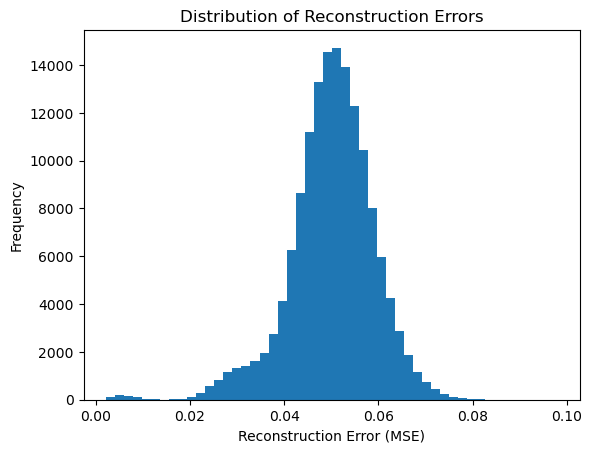

In [28]:
import matplotlib.pyplot as plt

# Plot the distribution of reconstruction errors
plt.hist(mse, bins=50)
plt.xlabel("Reconstruction Error (MSE)")
plt.ylabel("Frequency")
plt.title("Distribution of Reconstruction Errors")
plt.show()

This plot helps to understand the range and frequency of reconstruction errors, which is useful in determining an appropriate threshold for identifying anomalies. By analyzing the histogram, we can set a threshold that distinguishes between normal and anomalous patterns based on the distribution of reconstruction errors.

In [29]:
threshold = np.percentile(mse, 85)
print("Anomaly Detection Threshold:", threshold)


Anomaly Detection Threshold: 0.058553303025048464


In [30]:
# Classify sequences
anomalies = mse > threshold

# Count the number of anomalies
num_anomalies = np.sum(anomalies)
print(f"Number of anomalies detected: {num_anomalies}")


Number of anomalies detected: 22211


In [31]:
anomalous_sequences = X_train[anomalies]

In [32]:
# Get reconstruction errors for each anomalous sequence
anomalous_errors = mse[anomalies]

# Combine anomalous sequences and their reconstruction errors for inspection
anomalies_info = list(zip(anomalous_sequences, anomalous_errors))

# Display a few examples
for i, (sequence, error) in enumerate(anomalies_info[:5]):  # Show the first 5 anomalies as examples
    print(f"Anomaly {i+1} - Reconstruction Error: {error}")
    #print(sequence)

Anomaly 1 - Reconstruction Error: 0.062451182644588314
Anomaly 2 - Reconstruction Error: 0.05970144511011083
Anomaly 3 - Reconstruction Error: 0.07172279443490616
Anomaly 4 - Reconstruction Error: 0.06151836625579902
Anomaly 5 - Reconstruction Error: 0.058630037761146954


1/1 [==============================] - 0s 78ms/step
Sample at index 114135 is normal with reconstruction error: 0.05211295457183152


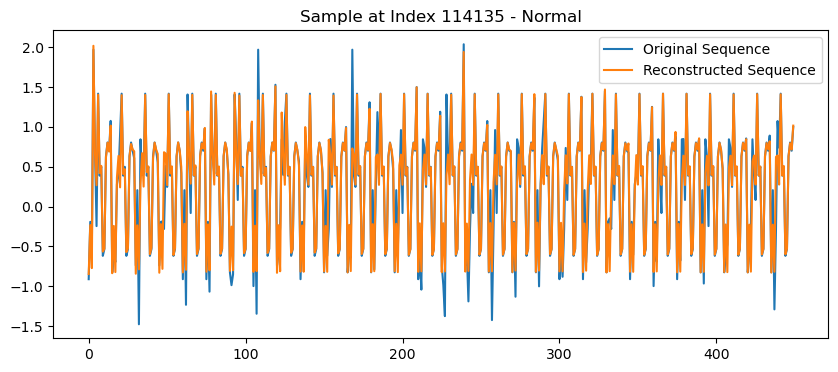

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Set a random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Step 1: Select a random sample from X_train
num_samples = 5  # Number of random samples to select
random_index = 114135 # np.random.choice(len(X_train), num_samples, replace=False)[0]
random_sample = X_train[random_index:random_index + 1]  # Extract a single sample, keep dimensions

# Step 2: Use the model to reconstruct the sample
reconstruction = model.predict(random_sample)

# Step 3: Calculate the reconstruction error
reconstruction_error = np.mean(np.power(random_sample - reconstruction, 2))

# Step 4: Determine if the sample is an anomaly based on the threshold
if reconstruction_error > threshold:
    print(f"Sample at index {random_index} is an anomaly with reconstruction error: {reconstruction_error}")
else:
    print(f"Sample at index {random_index} is normal with reconstruction error: {reconstruction_error}")

# Step 5: Plot the original sequence and its reconstruction
plt.figure(figsize=(10, 4))
plt.plot(random_sample.flatten(), label="Original Sequence")
plt.plot(reconstruction.flatten(), label="Reconstructed Sequence")
plt.title(f"Sample at Index {random_index} - {'Anomaly' if reconstruction_error > threshold else 'Normal'}")
plt.legend()
plt.show()


In [34]:
import numpy as np

# Assuming `model` is your trained LSTM Autoencoder and `threshold` is your anomaly detection threshold

# Step 1: Select Random Samples from X_train
num_samples = 5  # Set the number of random samples you want to test
random_indices = np.random.choice(len(X_train), num_samples, replace=False)
print("Randomly selected indices:", random_indices)
random_samples = X_train[random_indices]

# Step 2: Use the model to reconstruct each sample
reconstructions = model.predict(random_samples)

# Step 3: Calculate the reconstruction error for each sample
reconstruction_errors = np.mean(np.power(random_samples - reconstructions, 2), axis=(1, 2))

# Step 4: Determine if each sample is an anomaly based on the threshold
for i in range(num_samples):
    error = reconstruction_errors[i]
    if error > threshold:
        print(f"\nSample {i+1} - Reconstruction Error: {error} - Anomaly Detected")
    else:
        print(f"\nSample {i+1} - Reconstruction Error: {error} - Normal Sequence")
    
    # Step 5: Calculate feature-wise reconstruction error
    feature_errors = np.mean(np.power(random_samples[i] - reconstructions[i], 2), axis=0)  # Mean over time steps
    
    # Identify top 3 features contributing to the anomaly
    top_features = np.argsort(feature_errors)[-3:]  # Get indices of the top 3 highest error features
    print("Top contributing feature indices:", top_features)
    #print("Feature-wise reconstruction errors:", feature_errors)
    
    # If you have a list of feature names, use it to map feature indices to names
    # Assuming `feature_names` is a list of the names of features in the same order as in X_train
    feature_names = data_LSTM.columns[2:]  # Replace 2 if your feature columns start at a different index
    top_feature_names = [feature_names[j] for j in top_features]
    print("Top contributing feature names:", top_feature_names)
    

Randomly selected indices: [115147   1543 130683 141275 102242]
1/1 [==============================] - 0s 32ms/step

Sample 1 - Reconstruction Error: 0.0488417064439242 - Normal Sequence
Top contributing feature indices: [3 1 2]
Top contributing feature names: ['Oxygen Saturation', 'Respiratory Rate', 'Body Temperature']

Sample 2 - Reconstruction Error: 0.05249700773011594 - Normal Sequence
Top contributing feature indices: [5 2 3]
Top contributing feature names: ['Diastolic Blood Pressure', 'Body Temperature', 'Oxygen Saturation']

Sample 3 - Reconstruction Error: 0.045900404225302664 - Normal Sequence
Top contributing feature indices: [5 1 3]
Top contributing feature names: ['Diastolic Blood Pressure', 'Respiratory Rate', 'Oxygen Saturation']

Sample 4 - Reconstruction Error: 0.060335217672965125 - Anomaly Detected
Top contributing feature indices: [2 1 3]
Top contributing feature names: ['Body Temperature', 'Respiratory Rate', 'Oxygen Saturation']

Sample 5 - Reconstruction Error: 

4/4 [==============================] - 0s 11ms/step
Sample 1 (Index 23631) - Reconstruction Error: 0.05312623109147189 - Normal Sequence
Sample 2 (Index 97627) - Reconstruction Error: 0.05862657124205376 - Anomaly Detected
Sample 3 (Index 126636) - Reconstruction Error: 0.03534210816013166 - Normal Sequence
Sample 4 (Index 141366) - Reconstruction Error: 0.05093981292606025 - Normal Sequence
Sample 5 (Index 63708) - Reconstruction Error: 0.05309694478610671 - Normal Sequence
Sample 6 (Index 96200) - Reconstruction Error: 0.06055689848024978 - Anomaly Detected
Sample 7 (Index 16900) - Reconstruction Error: 0.051856579929916914 - Normal Sequence
Sample 8 (Index 77979) - Reconstruction Error: 0.03663511983347906 - Normal Sequence
Sample 9 (Index 112729) - Reconstruction Error: 0.05462622689780251 - Normal Sequence
Sample 10 (Index 62174) - Reconstruction Error: 0.047819338291571076 - Normal Sequence
Sample 11 (Index 134287) - Reconstruction Error: 0.04190768278768432 - Normal Sequence
Sam

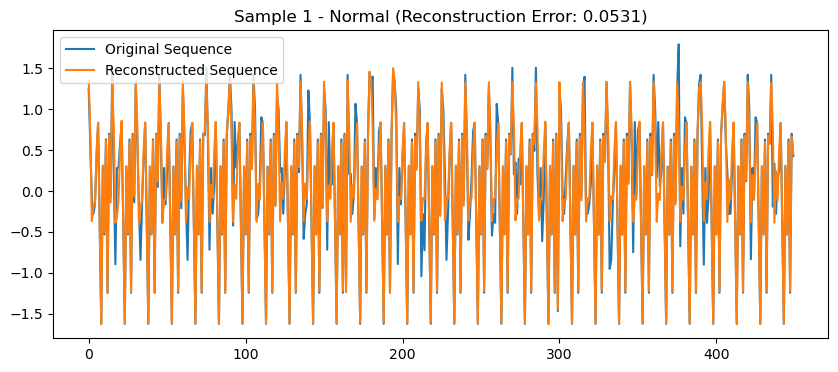

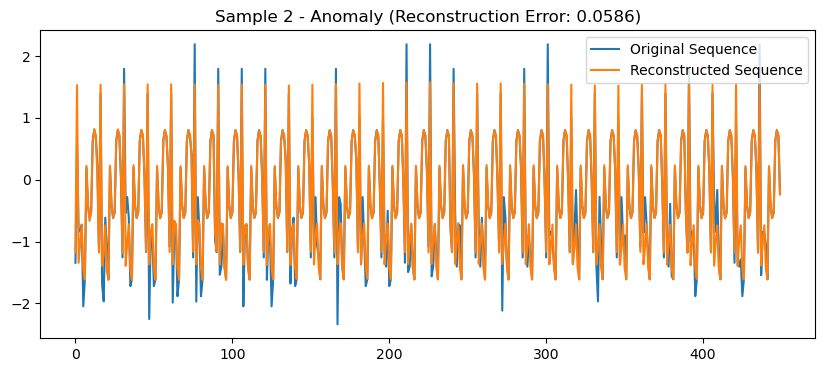

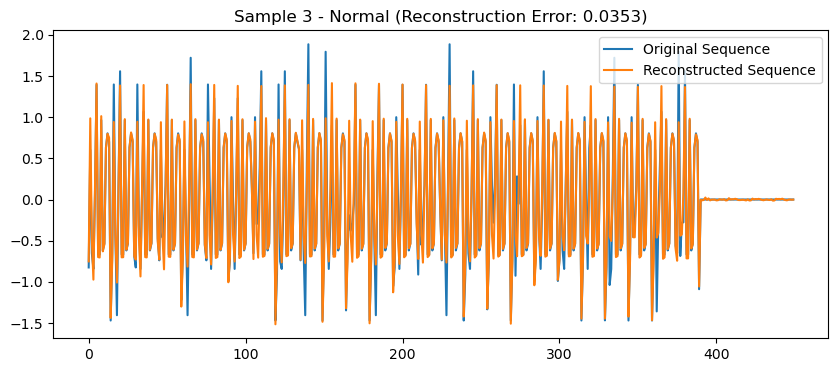

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Assume `model` is your trained LSTM Autoencoder, `threshold` is your anomaly detection threshold,
# and `X_train` is the dataset to test.

# Parameters
num_test_samples = 100  # Number of random samples to test
anomaly_count = 0  # To keep track of detected anomalies
normal_count = 0  # To keep track of detected normals
anomaly_errors = []  # To store reconstruction errors for anomalies
normal_errors = []  # To store reconstruction errors for normals

# Step 1: Select random samples from X_train
random_indices = np.random.choice(len(X_train), num_test_samples, replace=False)
random_samples = X_train[random_indices]

# Step 2: Use the model to reconstruct each sample
reconstructions = model.predict(random_samples)

# Step 3: Calculate the reconstruction error for each sample and classify as anomaly or normal
for i in range(num_test_samples):
    sample = random_samples[i:i+1]  # Extract sample with correct shape
    reconstruction = reconstructions[i:i+1]
    
    # Calculate reconstruction error
    reconstruction_error = np.mean(np.power(sample - reconstruction, 2))
    
    if reconstruction_error > threshold:
        print(f"Sample {i+1} (Index {random_indices[i]}) - Reconstruction Error: {reconstruction_error} - Anomaly Detected")
        anomaly_count += 1
        anomaly_errors.append(reconstruction_error)
    else:
        print(f"Sample {i+1} (Index {random_indices[i]}) - Reconstruction Error: {reconstruction_error} - Normal Sequence")
        normal_count += 1
        normal_errors.append(reconstruction_error)

# Step 4: Calculate performance metrics
anomaly_detection_rate = (anomaly_count / num_test_samples) * 100
average_anomaly_error = np.mean(anomaly_errors) if anomaly_errors else 0
average_normal_error = np.mean(normal_errors) if normal_errors else 0

print("\nPerformance Summary:")
print(f"Total Test Samples: {num_test_samples}")
print(f"Anomalies Detected: {anomaly_count}")
print(f"Normal Sequences Detected: {normal_count}")
print(f"Anomaly Detection Rate: {anomaly_detection_rate:.2f}%")
print(f"Average Reconstruction Error for Anomalies: {average_anomaly_error:.4f}")
print(f"Average Reconstruction Error for Normals: {average_normal_error:.4f}")

# Step 5: Optional - Plot a few random samples to visualize anomaly vs normal
for idx in range(min(3, num_test_samples)):  # Plot up to 3 samples
    sample = random_samples[idx].flatten()
    reconstruction = reconstructions[idx].flatten()
    reconstruction_error = np.mean(np.power(sample - reconstruction, 2))
    label = "Anomaly" if reconstruction_error > threshold else "Normal"
    
    plt.figure(figsize=(10, 4))
    plt.plot(sample, label="Original Sequence")
    plt.plot(reconstruction, label="Reconstructed Sequence")
    plt.title(f"Sample {idx+1} - {label} (Reconstruction Error: {reconstruction_error:.4f})")
    plt.legend()
    plt.show()


In [36]:
import numpy as np
import pandas as pd

# Assuming `model` is your trained LSTM Autoencoder, `threshold` is set,
# `X_train` is your dataset, and `reconstructions` contains reconstructed sequences

# Step 1: Calculate reconstruction errors for each sample in X_train
reconstructions = model.predict(X_train)
reconstruction_errors = np.mean(np.power(X_train - reconstructions, 2), axis=(1, 2))

# Step 2: Identify anomalous samples based on the threshold
anomalous_indices = np.where(reconstruction_errors > threshold)[0]
anomalous_samples = X_train[anomalous_indices]
anomalous_reconstructions = reconstructions[anomalous_indices]

# Step 3: Calculate feature-wise reconstruction errors for each anomalous sample
feature_errors = np.mean(np.power(anomalous_samples - anomalous_reconstructions, 2), axis=1)

# Step 4: Aggregate feature errors across all anomalies to find the average error per feature
average_feature_errors = np.mean(feature_errors, axis=0)  # Mean error per feature across anomalies

# Get all feature names (assuming they start from a certain index in your DataFrame)
feature_names = data_LSTM.columns[2:]  # Replace `2` if your feature columns start at a different index

print("\nValue Ranges for All Features in Anomalous Samples:")
# Step 5: Loop through each feature to calculate its value range in anomalous samples
for feature_index, feature_name in enumerate(feature_names):
    # Extract the values for this feature across all anomalous samples and all time steps
    feature_values = anomalous_samples[:, :, feature_index].flatten()
    print(f"{feature_name} - Min: {feature_values.min()}, Max: {feature_values.max()}, Avg Reconstruction Error: {average_feature_errors[feature_index]:.4f}")


4628/4628 [==============================] - 57s 12ms/step

Value Ranges for All Features in Anomalous Samples:
Heart Rate - Min: -2.034306741322164, Max: 2.025864839553833, Avg Reconstruction Error: 0.0082
Respiratory Rate - Min: -3.369024397962776, Max: 3.3829797473296774, Avg Reconstruction Error: 0.1918
Body Temperature - Min: -3.2386726308267724, Max: 3.372844111614528, Avg Reconstruction Error: 0.1977
Oxygen Saturation - Min: -3.653338670730591, Max: 3.653839111328125, Avg Reconstruction Error: 0.3716
Systolic Blood Pressure - Min: -2.6379331173350216, Max: 2.7586242699149373, Avg Reconstruction Error: 0.0530
Diastolic Blood Pressure - Min: -2.867177963256836, Max: 3.0323828088999405, Avg Reconstruction Error: 0.1166
Derived_HRV - Min: -1.7301739800669487, Max: 1.7339000969374705, Avg Reconstruction Error: 0.0003
Derived_Pulse_Pressure - Min: -2.302851231983614, Max: 2.309270170837662, Avg Reconstruction Error: 0.0010
Derived_BMI - Min: -1.9297462207921634, Max: 2.955073975352985

In [37]:
data_LSTM.describe()

,Patient ID,Day_label,Heart Rate,Respiratory Rate,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Sleep efficiency,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,TotalSteps
count,4.378198e+06,4.378198e+06,4.378198e+06,4.378198e+06,4.378198e+06,4.378198e+06,4.378198e+06,4.378198e+06,4.378198e+06,4.378198e+06,4.378198e+06,4.378198e+06,4.378198e+06,4.378198e+06,4.378198e+06,4.378198e+06,4.378198e+06
mean,7.402925e+04,1.551485e+01,9.319406e-17,1.792992e-16,6.254932e-14,-1.799306e-15,-1.170054e-16,-1.105878e-15,-1.555398e-16,-5.604887e-17,-1.515540e-16,-1.774037e-16,-1.147723e-15,-2.595620e-16,1.707874e-15,1.485496e-15,2.788486e-17
std,4.274694e+04,8.776701e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.000000e+00,0.000000e+00,-2.120693e+00,-3.369024e+00,-3.290736e+00,-3.653339e+00,-2.750361e+00,-3.031055e+00,-1.730233e+00,-2.302851e+00,-1.929746e+00,-2.083091e+00,-5.323969e-01,-1.525645e+00,-1.245012e+00,-1.596614e+00,-7.174158e+00
25%,3.700700e+04,8.000000e+00,-8.248939e-01,-9.859641e-01,-7.926239e-01,-8.428857e-01,-8.390807e-01,-7.367810e-01,-8.639494e-01,-7.654774e-01,-7.545591e-01,-6.181844e-01,-5.323969e-01,-8.068758e-01,-1.245012e+00,-8.309643e-01,-7.424823e-01
50%,7.401200e+04,1.600000e+01,3.897234e-02,-1.916107e-01,1.762201e-04,2.812955e-01,-5.208270e-02,-8.127422e-02,1.177656e-03,3.209469e-03,-1.061183e-01,-6.181844e-01,-5.323969e-01,6.306635e-01,8.032053e-01,7.003350e-01,-3.163118e-02
75%,1.110560e+05,2.300000e+01,8.164520e-01,6.027427e-01,7.915946e-01,8.433861e-01,8.473435e-01,7.381092e-01,8.634292e-01,7.718964e-01,6.490243e-01,8.467215e-01,-5.323969e-01,6.306635e-01,8.032053e-01,7.003350e-01,6.106086e-01
max,1.480690e+05,3.000000e+01,2.025865e+00,3.382980e+00,3.425570e+00,3.653839e+00,2.758624e+00,3.196259e+00,1.733959e+00,2.309270e+00,2.971418e+00,2.311628e+00,2.151792e+00,2.068203e+00,8.032053e-01,1.465985e+00,4.198493e+00


In [38]:
data

,Patient ID,Heart Rate,Respiratory Rate,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,Weight (kg),...,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Day_label,Calories,TrackerDistance,TotalSteps
0,1,94,17,36.414555,98,117,78,56,0,52.910328,...,20.0,1.0,50.0,0.0,0,0.0,5,2937,9,14172
1,1,93,16,36.183663,97,111,82,56,0,52.910328,...,20.0,1.0,50.0,0.0,0,0.0,6,2742,8,12862
2,1,95,17,36.702332,95,112,79,56,0,52.910328,...,20.0,1.0,50.0,0.0,0,0.0,7,2668,7,11179
3,1,93,16,36.351006,98,113,81,56,0,52.910328,...,20.0,1.0,50.0,0.0,0,0.0,8,2098,3,5273
4,1,93,16,36.654928,96,114,75,56,0,52.910328,...,20.0,1.0,50.0,0.0,0,0.0,9,2076,3,4631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378193,148069,94,12,35.844877,97,126,79,89,1,60.847492,...,53.0,3.0,0.0,3.0,1,3.0,26,1659,2,4188
4378194,148069,92,12,35.763984,98,126,79,89,1,60.847492,...,53.0,3.0,0.0,3.0,1,3.0,27,2105,8,12342
4378195,148069,93,12,36.213542,99,126,78,89,1,60.847492,...,53.0,3.0,0.0,3.0,1,3.0,28,2361,10,15448
4378196,148069,91,12,36.478046,99,126,83,89,1,60.847492,...,53.0,3.0,0.0,3.0,1,3.0,29,1855,4,6722


#### Build CNN+LSTM MODEL:

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, RepeatVector, TimeDistributed, Reshape, Masking

# Define the CNN+LSTM Autoencoder model
timesteps = 30  # Number of time steps (e.g., 30 days)
num_features = X_train.shape[2]  # Number of features per time step

model = Sequential([
    # Masking layer for padded sequences
    Masking(mask_value=0.0, input_shape=(timesteps, num_features)),
    
    # CNN Layers for feature extraction
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2, padding='same'),
    Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2, padding='same'),
    
    # Flatten before feeding into LSTM
    Flatten(),
    
    # Fully connected dense layer for latent representation
    Dense(128, activation='relu'),
    RepeatVector(timesteps),  # Repeat the latent representation for each time step
    
    # Decoder: Reshape and pass through LSTM layers
    Reshape((timesteps, -1)),  # Reshape to match LSTM input requirements
    LSTM(64, activation='tanh', return_sequences=True),
    LSTM(32, activation='tanh', return_sequences=True),
    
    # Final TimeDistributed layer for reconstruction
    TimeDistributed(Dense(num_features))  # Output layer with num_features neurons per time step
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 30, 15)            0         
                                                                 
 conv1d (Conv1D)             (None, 30, 64)            2944      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 15, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 32)            6176      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 8, 32)            0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0

In [22]:
history = model.fit(
    X_train, X_train,  # Autoencoders train to reconstruct the input
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
3702/3702 [==============================] - 77s 18ms/step - loss: 0.1294 - val_loss: 0.0906
Epoch 2/50
3702/3702 [==============================] - 66s 18ms/step - loss: 0.0895 - val_loss: 0.0842
Epoch 3/50
3702/3702 [==============================] - 69s 19ms/step - loss: 0.0821 - val_loss: 0.0736
Epoch 4/50
3702/3702 [==============================] - 67s 18ms/step - loss: 0.0716 - val_loss: 0.0643
Epoch 5/50
3702/3702 [==============================] - 64s 17ms/step - loss: 0.0633 - val_loss: 0.0595
Epoch 6/50
3702/3702 [==============================] - 64s 17ms/step - loss: 0.0583 - val_loss: 0.0551
Epoch 7/50
3702/3702 [==============================] - 69s 19ms/step - loss: 0.0551 - val_loss: 0.0533
Epoch 8/50
3702/3702 [==============================] - 71s 19ms/step - loss: 0.0556 - val_loss: 0.0522
Epoch 9/50
3702/3702 [==============================] - 79s 21ms/step - loss: 0.0531 - val_loss: 0.0508
Epoch 10/50
3702/3702 [==============================] - 65s 18m

In [23]:
reconstructions = model.predict(X_train)

mse = np.mean(np.power(X_train - reconstructions, 2), axis=(1, 2))  # axis=(1, 2) to average over time steps and features
print(mse)

4628/4628 [==============================] - 27s 6ms/step
[0.02697645 0.02896192 0.03174217 ... 0.02759402 0.03865359 0.03141177]


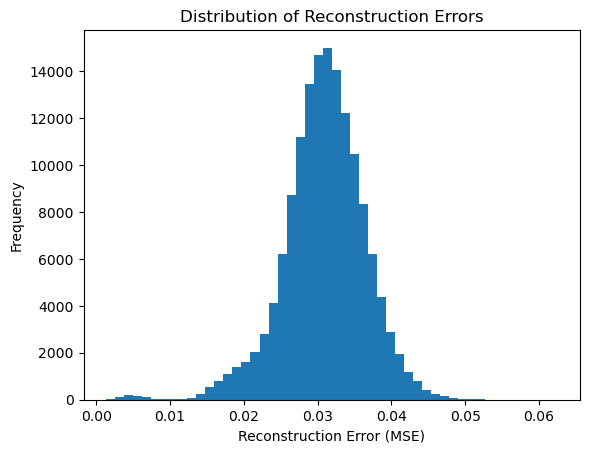

In [24]:
import matplotlib.pyplot as plt

# Plot the distribution of reconstruction errors
plt.hist(mse, bins=50)
plt.xlabel("Reconstruction Error (MSE)")
plt.ylabel("Frequency")
plt.title("Distribution of Reconstruction Errors")
plt.show()

In [25]:
threshold = np.percentile(mse, 85)
print("Anomaly Detection Threshold:", threshold)


Anomaly Detection Threshold: 0.03618396067468485


In [26]:
# Classify sequences
anomalies = mse > threshold

# Count the number of anomalies
num_anomalies = np.sum(anomalies)
print(f"Number of anomalies detected: {num_anomalies}")


Number of anomalies detected: 22211


In [27]:
anomalous_sequences = X_train[anomalies]

In [28]:
# Get reconstruction errors for each anomalous sequence
anomalous_errors = mse[anomalies]

# Combine anomalous sequences and their reconstruction errors for inspection
anomalies_info = list(zip(anomalous_sequences, anomalous_errors))

# Display a few examples
for i, (sequence, error) in enumerate(anomalies_info[:5]):  # Show the first 5 anomalies as examples
    print(f"Anomaly {i+1} - Reconstruction Error: {error}")
    #print(sequence)

Anomaly 1 - Reconstruction Error: 0.04055647948291298
Anomaly 2 - Reconstruction Error: 0.0379509086652907
Anomaly 3 - Reconstruction Error: 0.03674911741441788
Anomaly 4 - Reconstruction Error: 0.0372004394996889
Anomaly 5 - Reconstruction Error: 0.03692612617488042


1/1 [==============================] - 0s 192ms/step
Sample at index 114135 is normal with reconstruction error: 0.031056108521075924


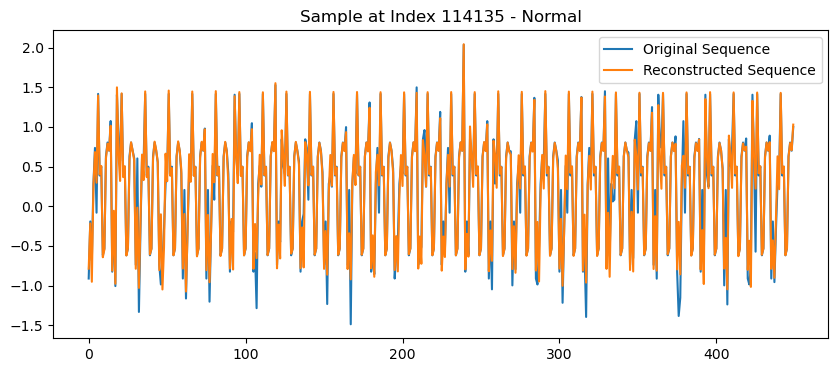

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Set a random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Step 1: Select a random sample from X_train
num_samples = 5  # Number of random samples to select
random_index = 114135 # np.random.choice(len(X_train), num_samples, replace=False)[0]
random_sample = X_train[random_index:random_index + 1]  # Extract a single sample, keep dimensions

# Step 2: Use the model to reconstruct the sample
reconstruction = model.predict(random_sample)

# Step 3: Calculate the reconstruction error
reconstruction_error = np.mean(np.power(random_sample - reconstruction, 2))

# Step 4: Determine if the sample is an anomaly based on the threshold
if reconstruction_error > threshold:
    print(f"Sample at index {random_index} is an anomaly with reconstruction error: {reconstruction_error}")
else:
    print(f"Sample at index {random_index} is normal with reconstruction error: {reconstruction_error}")

# Step 5: Plot the original sequence and its reconstruction
plt.figure(figsize=(10, 4))
plt.plot(random_sample.flatten(), label="Original Sequence")
plt.plot(reconstruction.flatten(), label="Reconstructed Sequence")
plt.title(f"Sample at Index {random_index} - {'Anomaly' if reconstruction_error > threshold else 'Normal'}")
plt.legend()
plt.show()


In [44]:
X_train.shape

(3502558, 25)

In [64]:
import numpy as np

# Assuming `model` is your trained LSTM Autoencoder and `threshold` is your anomaly detection threshold

# Step 1: Select Random Samples from X_train
num_samples = 5  # Set the number of random samples you want to test
random_indices = np.random.choice(len(X_train), num_samples, replace=False)
print("Randomly selected indices:", random_indices)
random_samples = X_train[random_indices]

# Step 2: Use the model to reconstruct each sample
reconstructions = model.predict(random_samples)

# Step 3: Calculate the reconstruction error for each sample
reconstruction_errors = np.mean(np.power(random_samples - reconstructions, 2), axis=(1, 2))

# Step 4: Determine if each sample is an anomaly based on the threshold
for i in range(num_samples):
    error = reconstruction_errors[i]
    if error > threshold:
        print(f"\nSample {i+1} - Reconstruction Error: {error} - Anomaly Detected")
    else:
        print(f"\nSample {i+1} - Reconstruction Error: {error} - Normal Sequence")
    
    # Step 5: Calculate feature-wise reconstruction error
    feature_errors = np.mean(np.power(random_samples[i] - reconstructions[i], 2), axis=0)  # Mean over time steps
    
    # Identify top 3 features contributing to the anomaly
    top_features = np.argsort(feature_errors)[-3:]  # Get indices of the top 3 highest error features
    print("Top contributing feature indices:", top_features)
    #print("Feature-wise reconstruction errors:", feature_errors)
    
    # If you have a list of feature names, use it to map feature indices to names
    # Assuming `feature_names` is a list of the names of features in the same order as in X_train
    feature_names = data_LSTM.columns[2:]  # Replace 2 if your feature columns start at a different index
    top_feature_names = [feature_names[j] for j in top_features]
    print("Top contributing feature names:", top_feature_names)
    

Randomly selected indices: [140199  58182  95694  90670 139397]
1/1 [==============================] - 1s 532ms/step

Sample 1 - Reconstruction Error: 0.02350663209049614 - Normal Sequence
Top contributing feature indices: [5 2 1]
Top contributing feature names: ['Diastolic Blood Pressure', 'Body Temperature', 'Respiratory Rate']

Sample 2 - Reconstruction Error: 0.03294286733049988 - Normal Sequence
Top contributing feature indices: [5 2 1]
Top contributing feature names: ['Diastolic Blood Pressure', 'Body Temperature', 'Respiratory Rate']

Sample 3 - Reconstruction Error: 0.024718435564017194 - Normal Sequence
Top contributing feature indices: [2 5 1]
Top contributing feature names: ['Body Temperature', 'Diastolic Blood Pressure', 'Respiratory Rate']

Sample 4 - Reconstruction Error: 0.03274744211404306 - Normal Sequence
Top contributing feature indices: [2 5 1]
Top contributing feature names: ['Body Temperature', 'Diastolic Blood Pressure', 'Respiratory Rate']

Sample 5 - Reconstruc

4/4 [==============================] - 0s 4ms/step
Sample 1 (Index 89954) - Reconstruction Error: 0.02212100203583374 - Normal Sequence
Sample 2 (Index 42427) - Reconstruction Error: 0.031935881463807526 - Normal Sequence
Sample 3 (Index 135887) - Reconstruction Error: 0.03846096414198279 - Anomaly Detected
Sample 4 (Index 50321) - Reconstruction Error: 0.03823236360798442 - Anomaly Detected
Sample 5 (Index 133677) - Reconstruction Error: 0.035399387466466745 - Normal Sequence
Sample 6 (Index 71588) - Reconstruction Error: 0.017720900796132907 - Normal Sequence
Sample 7 (Index 42830) - Reconstruction Error: 0.029781486684537697 - Normal Sequence
Sample 8 (Index 60935) - Reconstruction Error: 0.023129576548499314 - Normal Sequence
Sample 9 (Index 138507) - Reconstruction Error: 0.035206904850096685 - Normal Sequence
Sample 10 (Index 22282) - Reconstruction Error: 0.024062767056300467 - Normal Sequence
Sample 11 (Index 48100) - Reconstruction Error: 0.031343412509936074 - Normal Sequence

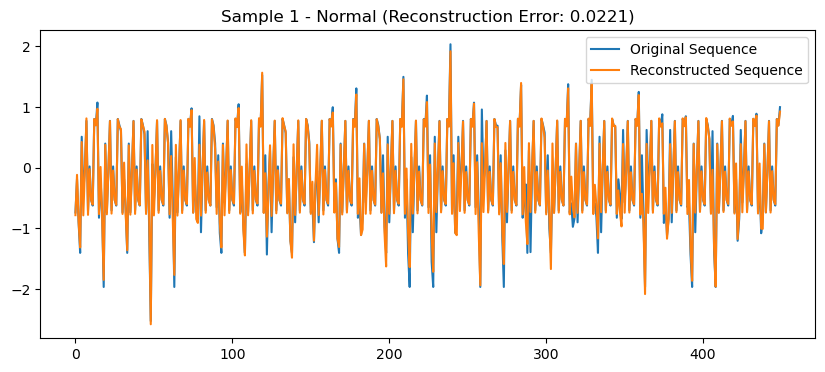

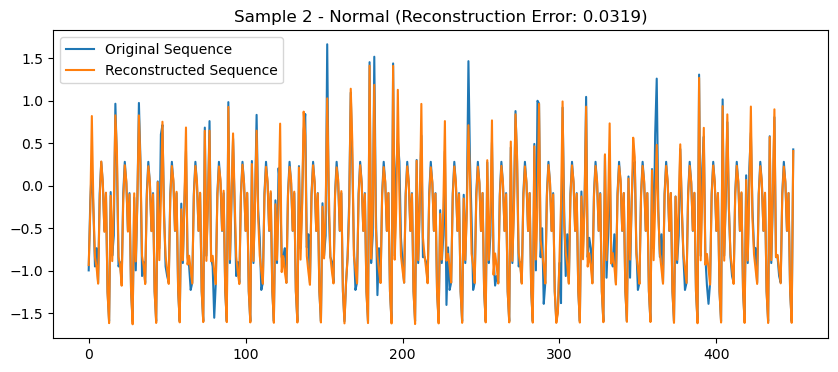

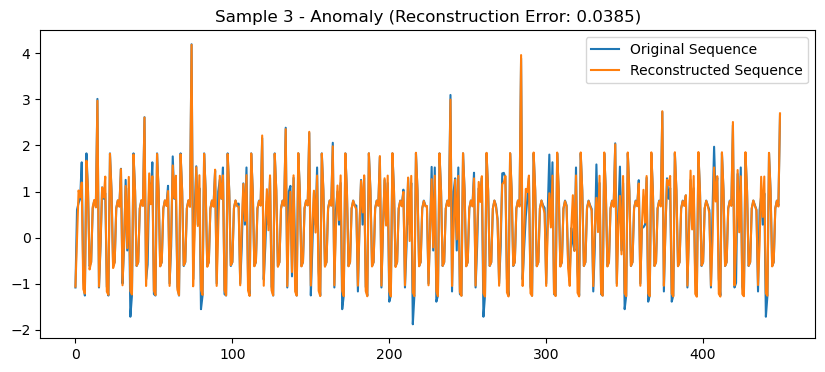

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Assume `model` is your trained LSTM Autoencoder, `threshold` is your anomaly detection threshold,
# and `X_train` is the dataset to test.

# Parameters
num_test_samples = 100  # Number of random samples to test
anomaly_count = 0  # To keep track of detected anomalies
normal_count = 0  # To keep track of detected normals
anomaly_errors = []  # To store reconstruction errors for anomalies
normal_errors = []  # To store reconstruction errors for normals

# Step 1: Select random samples from X_train
random_indices = np.random.choice(len(X_train), num_test_samples, replace=False)
random_samples = X_train[random_indices]

# Step 2: Use the model to reconstruct each sample
reconstructions = model.predict(random_samples)

# Step 3: Calculate the reconstruction error for each sample and classify as anomaly or normal
for i in range(num_test_samples):
    sample = random_samples[i:i+1]  # Extract sample with correct shape
    reconstruction = reconstructions[i:i+1]
    
    # Calculate reconstruction error
    reconstruction_error = np.mean(np.power(sample - reconstruction, 2))
    
    if reconstruction_error > threshold:
        print(f"Sample {i+1} (Index {random_indices[i]}) - Reconstruction Error: {reconstruction_error} - Anomaly Detected")
        anomaly_count += 1
        anomaly_errors.append(reconstruction_error)
    else:
        print(f"Sample {i+1} (Index {random_indices[i]}) - Reconstruction Error: {reconstruction_error} - Normal Sequence")
        normal_count += 1
        normal_errors.append(reconstruction_error)

# Step 4: Calculate performance metrics
anomaly_detection_rate = (anomaly_count / num_test_samples) * 100
average_anomaly_error = np.mean(anomaly_errors) if anomaly_errors else 0
average_normal_error = np.mean(normal_errors) if normal_errors else 0

print("\nPerformance Summary:")
print(f"Total Test Samples: {num_test_samples}")
print(f"Anomalies Detected: {anomaly_count}")
print(f"Normal Sequences Detected: {normal_count}")
print(f"Anomaly Detection Rate: {anomaly_detection_rate:.2f}%")
print(f"Average Reconstruction Error for Anomalies: {average_anomaly_error:.4f}")
print(f"Average Reconstruction Error for Normals: {average_normal_error:.4f}")

# Step 5: Optional - Plot a few random samples to visualize anomaly vs normal
for idx in range(min(3, num_test_samples)):  # Plot up to 3 samples
    sample = random_samples[idx].flatten()
    reconstruction = reconstructions[idx].flatten()
    reconstruction_error = np.mean(np.power(sample - reconstruction, 2))
    label = "Anomaly" if reconstruction_error > threshold else "Normal"
    
    plt.figure(figsize=(10, 4))
    plt.plot(sample, label="Original Sequence")
    plt.plot(reconstruction, label="Reconstructed Sequence")
    plt.title(f"Sample {idx+1} - {label} (Reconstruction Error: {reconstruction_error:.4f})")
    plt.legend()
    plt.show()

#### Building Features for Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

def create_health_indicators(data):
    features = pd.DataFrame()

    # Cardiovascular Risk Indicators
    features['high_heart_rate_days'] = (data['Heart Rate'] > 100).astype(int)
    features['high_systolic_bp_days'] = (data['Systolic Blood Pressure'] > 140).astype(int)
    features['high_diastolic_bp_days'] = (data['Diastolic Blood Pressure'] > 90).astype(int)
    features['low_hrv_days'] = (data['Derived_HRV'] < 20).astype(int)
    features['high_bmi'] = (data['Derived_BMI'] > 30).astype(int)

    # Respiratory Risk Indicators
    features['high_respiratory_rate_days'] = (data['Respiratory Rate'] > 20).astype(int)
    features['low_oxygen_saturation_days'] = (data['Oxygen Saturation'] < 90).astype(int)

    # Sleep Quality Indicators
    features['low_sleep_efficiency_days'] = (data['Sleep efficiency'] < 85).astype(int)
    features['insufficient_sleep_days'] = (data['Sleep duration'] < 6).astype(int)
    features['frequent_awakenings_days'] = (data['Awakenings'] > 5).astype(int)

    # Lifestyle and Workout Indicators
    features['low_activity_days'] = (data['TotalSteps'] < 5000).astype(int)
    features['high_caffeine_days'] = (data['Caffeine consumption'] > 300).astype(int)
    features['low_exercise_days'] = (data['Exercise frequency'] < 3).astype(int)
    features['high_caloric_intake_days'] = (data['Calories'] > 3000).astype(int)

    # Composite Scores for 12 Conditions
    features['cardiovascular_risk'] = (features[['high_heart_rate_days', 'high_systolic_bp_days', 'high_diastolic_bp_days', 'low_hrv_days', 'high_bmi']]).sum(axis=1)
    features['respiratory_risk'] = (features[['high_respiratory_rate_days', 'low_oxygen_saturation_days']]).sum(axis=1)
    features['sleep_quality_risk'] = (features[['low_sleep_efficiency_days', 'insufficient_sleep_days', 'frequent_awakenings_days']]).sum(axis=1)
    features['lifestyle_suggestion_score'] = (features[['low_activity_days', 'high_caffeine_days', 'low_exercise_days', 'high_caloric_intake_days']]).sum(axis=1)

    # Additional health risks based on condition-specific rules
    features['diabetes_risk'] = (features[['high_bmi', 'low_activity_days', 'insufficient_sleep_days', 'high_systolic_bp_days']]).sum(axis=1)
    features['anemia_risk'] = (features[['low_oxygen_saturation_days', 'high_heart_rate_days', 'frequent_awakenings_days']]).sum(axis=1)
    features['stress_risk'] = (features[['low_hrv_days', 'high_caffeine_days', 'low_sleep_efficiency_days', 'frequent_awakenings_days']]).sum(axis=1)
    features['obesity_risk'] = (features[['high_bmi', 'low_activity_days', 'high_caloric_intake_days']]).sum(axis=1)
    features['hypertension_risk'] = (features[['high_systolic_bp_days', 'high_diastolic_bp_days', 'high_bmi', 'low_hrv_days']]).sum(axis=1)
    features['sleep_apnea_risk'] = (features[['low_oxygen_saturation_days', 'high_respiratory_rate_days', 'frequent_awakenings_days']]).sum(axis=1)
    features['wellness_score'] = (features[['low_activity_days', 'low_exercise_days', 'low_sleep_efficiency_days', 'high_caloric_intake_days']]).sum(axis=1)

    return features






Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    869509
           1       1.00      1.00      1.00      6131

    accuracy                           1.00    875640
   macro avg       1.00      1.00      1.00    875640
weighted avg       1.00      1.00      1.00    875640

Confusion Matrix:
[[869509      0]
 [     0   6131]]


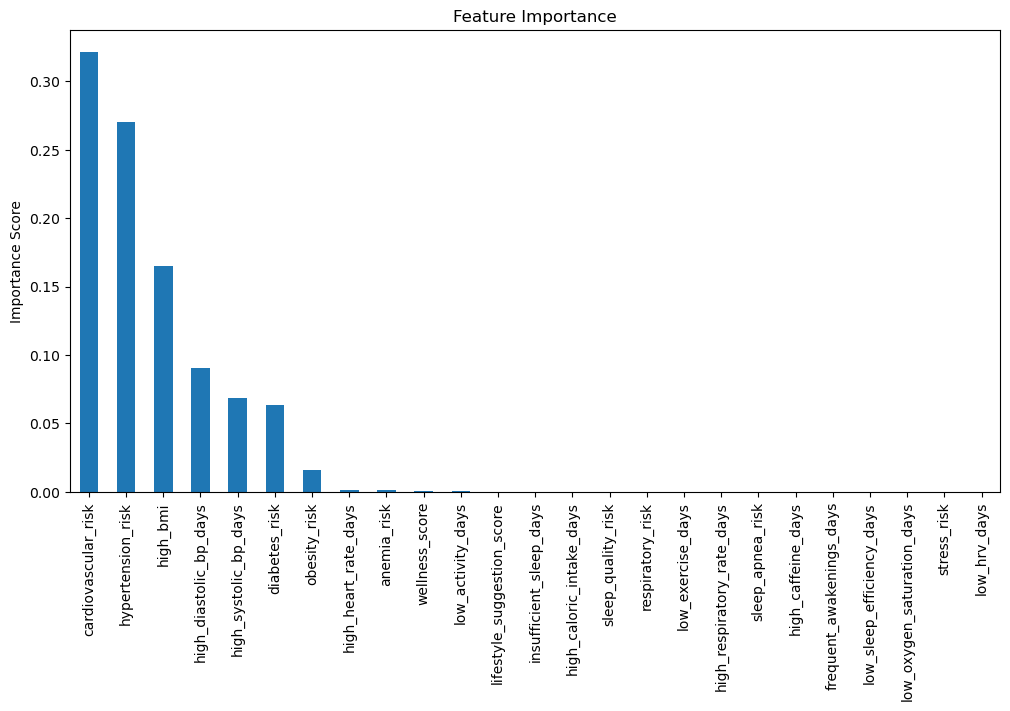

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Assume `data` is the original DataFrame with all required parameters
# Step 1: Generate Features
features = create_health_indicators(data)

# Step 2: Define Features (X) and Target (y)
X = features  # Use all features without dropping
y = (features['cardiovascular_risk'] > 2).astype(int)  # Binary classification target
# Example: Predict high cardiovascular risk (risk > 2)

# Step 3: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = rf_model.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature Importance
import matplotlib.pyplot as plt

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), title="Feature Importance")
plt.ylabel("Importance Score")
plt.show()


#### Conclusion:

This project presents a novel approach to leveraging machine learning for early detection of health anomalies and cardiovascular diseases by combining multiple health-related datasets. The use of LSTM Autoencoder for unsupervised anomaly detection, followed by an Random Forest classifier for disease prediction, provides a comprehensive framework for analyzing temporal health data. The integration of data augmentation and robust feature engineering ensures that the model is capable of handling real-world variability in health metrics, improving its predictive performance.

By focusing on sustained changes rather than isolated fluctuations, the proposed methodology enhances the accuracy of predictions and offers a practical solution for proactive healthcare management. This project demonstrates the potential for combining deep learning and classical machine learning models to deliver personalized, data-driven healthcare solutions, ultimately contributing to improved health outcomes and patient well-being.

